### Cvičení z Matematické statistiky, Václav Kalous

In [2]:
set.seed(379)

In [3]:
options(scipen = 999)

In [4]:
install.packages("readxl")
library(readxl)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Jako data využiji denní teploty v ČR mezi lety 1775 a 2019 meřené ČHMŮ v Rudolfinu.

In [5]:
m = read_excel("meteo.xlsx")

In [6]:
colnames(m) = c("rok","mesic","den","avg","max","min","sra","flag")

In [7]:
colnames(m)

[1] "rok"   "mesic" "den"   "avg"   "max"   "min"   "sra"   "flag"

In [8]:
head(m)

rok,mesic,den,avg,max,min,sra,flag
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
1775,1,1,-7.0,-4.8,-10.1,NA,NA
1775,1,2,-2.2,-1.4,-5.8,NA,NA
1775,1,3,-1.0,0.6,-2.2,NA,NA
1775,1,4,0.1,2.5,-3.6,NA,NA
1775,1,5,2.2,3.0,1.6,NA,NA
1775,1,6,3.2,4.0,1.6,NA,NA


#### Dvojvýběrové testy

Jako podskupiny si vyberu údaje mezi roky 1800 a 1810 a 2009 a 2019.

In [9]:
p1 = m[which(m$rok > 1800 & m$rok < 1810),]

In [10]:
p2 = m[which(m$rok > 2009 & m$rok < 2019),]

In [11]:
t.test(p1$avg,p2$avg)


	Welch Two Sample t-test

data:  p1$avg and p2$avg
t = -8.6464, df = 6553.3, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.207687 -1.391644
sample estimates:
mean of x mean of y 
  9.95537  11.75503 


In [12]:
t.test(p1$max,p2$max)


	Welch Two Sample t-test

data:  p1$max and p2$max
t = -10.161, df = 6570.8, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.822640 -1.909638
sample estimates:
mean of x mean of y 
 13.18765  15.55379 


In [13]:
t.test(p1$min,p2$min)


	Welch Two Sample t-test

data:  p1$min and p2$min
t = -8.2488, df = 6509.5, p-value < 0.00000000000000022
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.900153 -1.170428
sample estimates:
mean of x mean of y 
 6.650624  8.185914 


Z testů je patrné že mezi skupinami je rozdíl v průměru jak pro průměrnou, tak i pro minimální a maximální teplotu.

#### Vizualizace

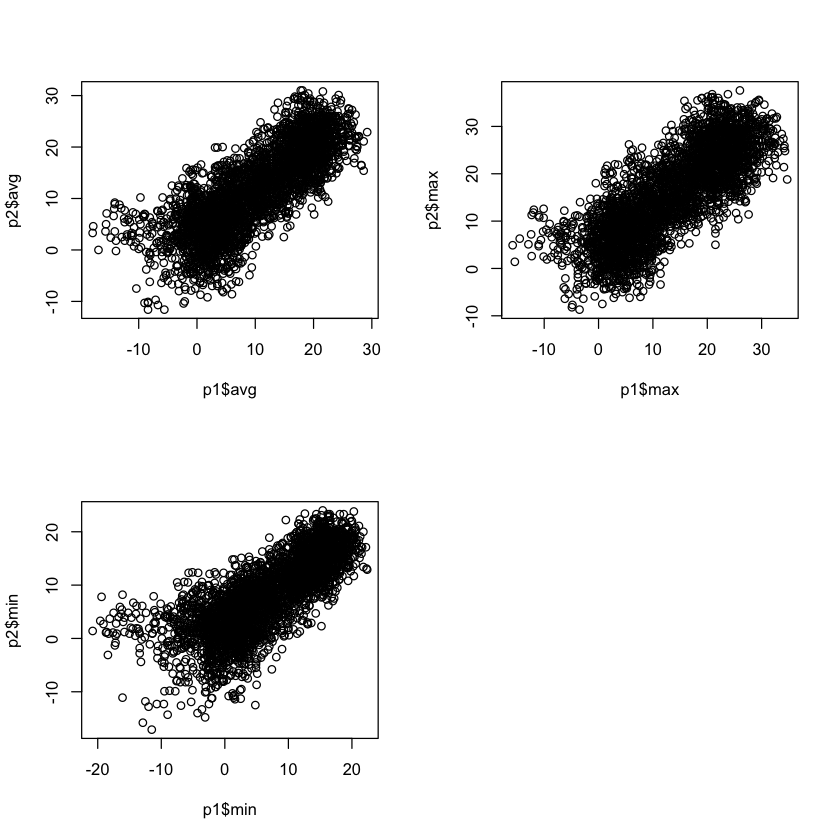

In [14]:
par(mfrow = c(2,2))
plot(p1$avg,p2$avg)
plot(p1$max,p2$max)
plot(p1$min,p2$min)

U všech tří scatterplotů je vidět shluk bodů vlevo dole, což naznačuje že zejména v zimním období jsou teploty v letech 2010-2019 vyšší než než před dvěstě lety. 

In [15]:
install.packages("MASS")
library(MASS)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [16]:
install.packages("aplpack")
library(aplpack)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in system2("/usr/bin/otool", c("-L", shQuote(DSO)), stdout = TRUE):
“running command ''/usr/bin/otool' -L '/opt/anaconda3/envs/r-tutorial/lib/R/library/tcltk/libs//tcltk.so'' had status 1”

---
Nyní se podíváme na nutriční údaje cereálií.


In [17]:
cer = read.csv("cereal.csv",header = TRUE, sep = ";", stringsAsFactors = FALSE)

In [18]:
head(cer)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,String,Categorical,Categorical,Int,Int,Int,Int,Float,Float,Int,Int,Int,Int,Float,Float,Float
2,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
3,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
4,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
5,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912
6,Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843


In [19]:
c = cer[5:10,][,4:6]

Zvolil jsem si 5 náhodných cereálních produktů. Nyní porovnám jejich obsah kalorií, bílkovin a tuku pomocí metody faces.

In [20]:
n = matrix(NA,nrow = nrow(c), ncol = ncol(c))

In [21]:
for (i in 1:nrow(c)){
    
    n[i,] = as.numeric(c[i,])
}

In [22]:
colnames(c)

[1] "calories" "protein"  "fat"

effect of variables:
 modified item       Var   
 "height of face   " "Var1"
 "width of face    " "Var2"
 "structure of face" "Var3"
 "height of mouth  " "Var1"
 "width of mouth   " "Var2"
 "smiling          " "Var3"
 "height of eyes   " "Var1"
 "width of eyes    " "Var2"
 "height of hair   " "Var3"
 "width of hair   "  "Var1"
 "style of hair   "  "Var2"
 "height of nose  "  "Var3"
 "width of nose   "  "Var1"
 "width of ear    "  "Var2"
 "height of ear   "  "Var3"


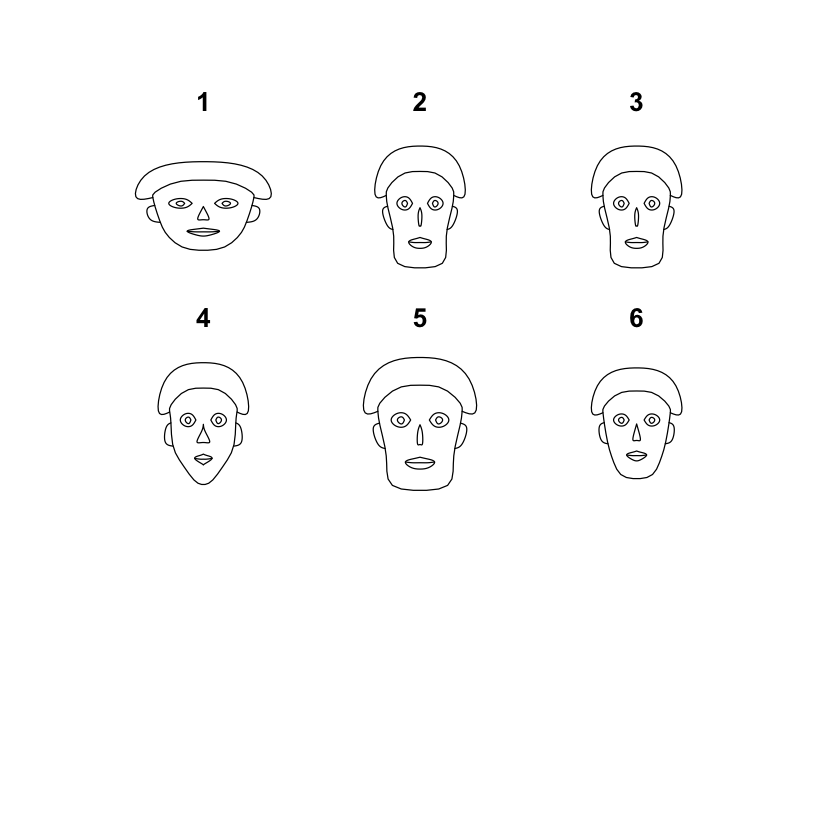

In [23]:
faces(n,fill = TRUE, face.type = 0)

Z obrázků je zjevné, že produkty 1 a 5 se výrazněji liší od ostatních. První hlava je široká, což bude dáno vyšším  obsahem bílkovin v produktu číslo 1. Číslo 5 je naopak vyšší hlava, což znamená více kalorií. 

In [24]:
c

,calories,protein,fat
,<chr>,<chr>,<chr>
5,50,4,0
6,110,2,2
7,110,2,2
8,110,2,0
9,130,3,2
10,90,2,1
